---
### 11.1.1 数据变换
#### 1. 中心化处理
减去变量的样本平均值
#### 2. 规格化变换
减去变量的最小值，再除以极差
#### 3. 标准化变换
首先减去变量的样本平均值，再除以标准差

### 11.1.2 样品（或指标）间亲疏程度的测度计算
对于变量之间的聚类分析（R型），常用相似系数来测度变量之间的亲疏程度

对于样品之间的聚类分析（Q型），常用距离来测度样品之间的亲疏程度

#### 1. 常用距离的计算
(1) 闵氏 (Minkowski) 距离
- 当 $q=1$ 时为绝对值距离（$L_1$ 范数，Manhattan 距离）
- 当 $q=2$ 时为欧几里得距离（$L_2$ 范数）
- 当 $q=\infty$ 时为切比雪夫距离（$L_\infty$ 范数）
(2) 马氏 (Mahalanobis) 距离
#### 2. 相似系数的计算
(1) 夹角余弦

(2) 皮尔逊相关系数

### 11.1.3 scipy.cluster.hierarchy 模块的系统聚类
#### 1. `linkage`
```python
Z = linkage(y, method='single', metric='euclidean')
```
`method`, `metric` 取值见 p329, p330
#### 2. `fcluster`
```python
T = fcluster(Z, t=k, criterion='maxclust')
```
从 `linkage` 的输出 `Z`，根据给定的类数 `k` 创建聚类
#### 3. `H=dendrogram(Z, p)`
由 `linkage` 产生的数据矩阵 `Z` 画聚类树状图。`p` 是节点数，默认值为 `30`

### 11.1.4 基于类间距离的系统聚类
系统聚类法：距离相近的样品（或变量）先聚为一类，距离远的后聚成类，持续此过程直到所有样品都聚到合适的类中。

下面是几种常用的系统聚类方法：
#### 1. 最短距离法
定义类 $G_i$ 与 $G_j$ 之间的距离为两类间最邻近的两样品之距离

In [1]:
import scipy.cluster.hierarchy as sch
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

直接使用原始数据聚类

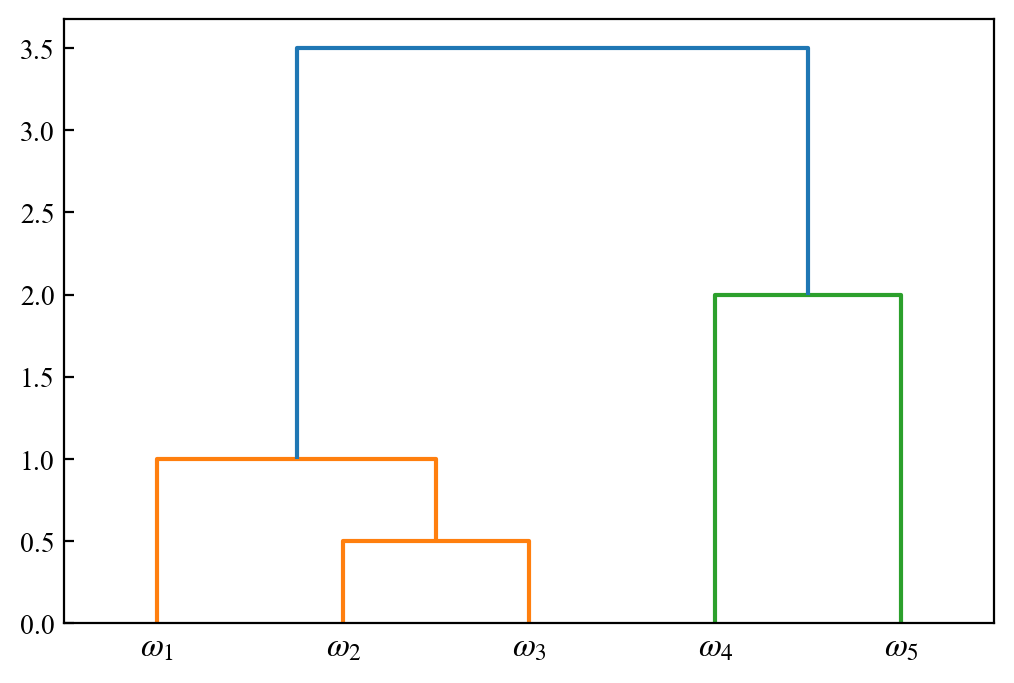

In [2]:
data = np.array([[2, 3, 3.5, 7, 9]]).T
c = sch.linkage(data, method='single', metric='euclidean')
x_tick_labels = [f'$\omega_{i}$' for i in range(1, 6)]
sch.dendrogram(c, labels=x_tick_labels)
plt.show()

使用距离聚类

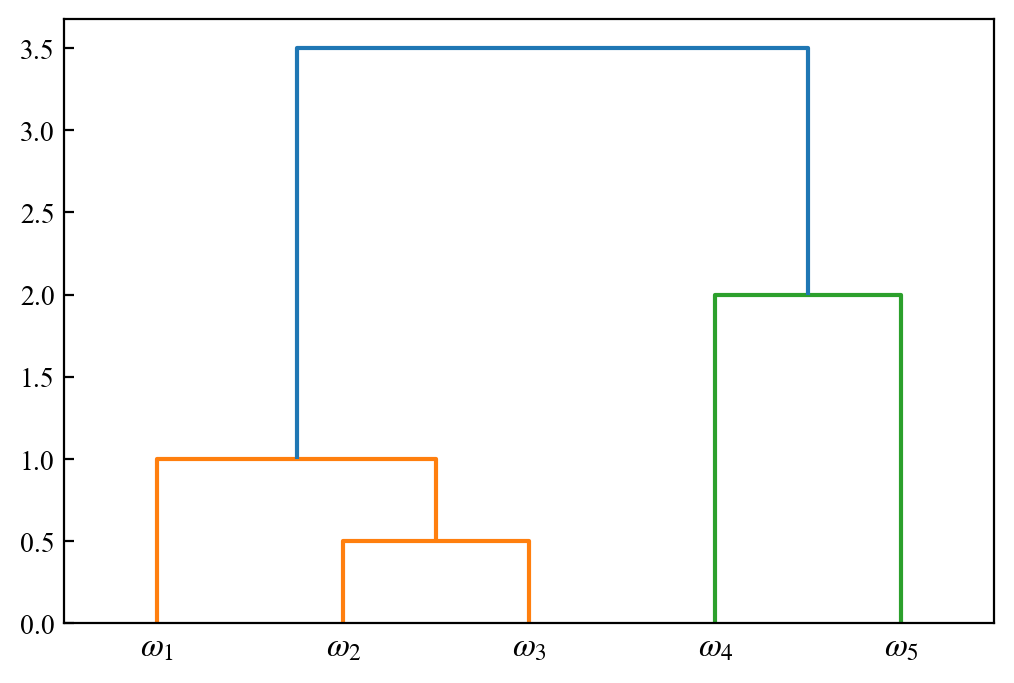

In [3]:
data = [2, 3, 3.5, 7, 9]
n = len(data)
dis = [abs(data[i] - data[j]) for i in range(n-1) for j in range(i+1, n)]
c = sch.linkage(dis)
x_tick_labels = [f'$\omega_{i}$' for i in range(1, 6)]
sch.dendrogram(c, labels=x_tick_labels)
plt.show()

In [4]:
data = np.loadtxt('../../11第11章  聚类分析与判别分析模型/data11_2.txt')
n = len(data)
ran = data.ptp(axis=0)
_min = data.min(axis=0)
B = (data - _min)/ran       # 规格化
np.round(B*100)

array([[ 91., 100.,   7.,  15.,  31., 100.,  14.],
       [100.,  87.,   0.,   0.,  15.,  24.,   0.],
       [ 20.,  15.,   7.,  44.,  53.,   8.,   7.],
       [ 43.,  38.,   0.,  13.,  30.,  13.,   0.],
       [  3.,   3., 100., 100., 100.,  47., 100.],
       [  3.,   3.,  61.,  69.,  71.,  13.,  59.],
       [  0.,   0.,  90.,  81.,   0.,  13., 100.],
       [ 91.,  53.,   7.,   0.,  23.,  43.,   9.],
       [ 38.,  26.,   4.,   0.,  28.,   0.,   0.]])

In [5]:
c = sch.linkage(B)
c

array([[ 3.        ,  8.        ,  0.22936743,  2.        ],
       [ 1.        ,  7.        ,  0.41898769,  2.        ],
       [ 2.        ,  9.        ,  0.51154586,  3.        ],
       [10.        , 11.        ,  0.61127812,  5.        ],
       [ 0.        , 12.        ,  0.76155642,  6.        ],
       [ 4.        ,  5.        ,  0.78381529,  2.        ],
       [13.        , 14.        ,  0.84001477,  8.        ],
       [ 6.        , 15.        ,  0.87684696,  9.        ]])

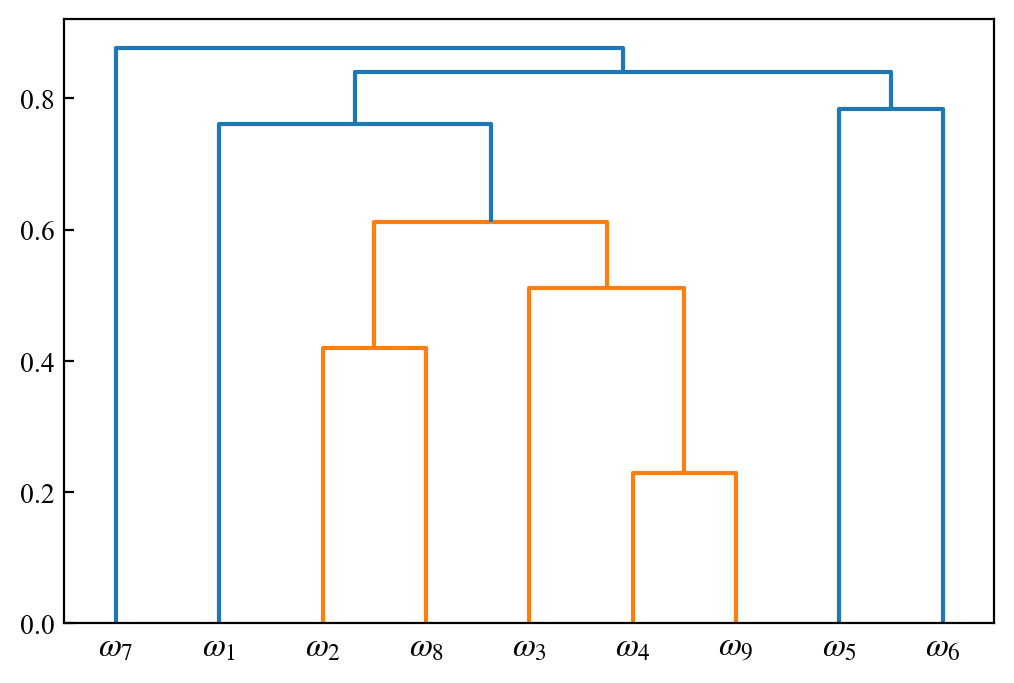

In [6]:
s = [rf"$\omega_{i}$" for i in range(1, 10)]
sch.dendrogram(c, labels=s)
plt.show()

#### 2. 最长距离法
定义类 $G_i$ 与 $G_j$ 之间的距离为两类间最远样品之距离

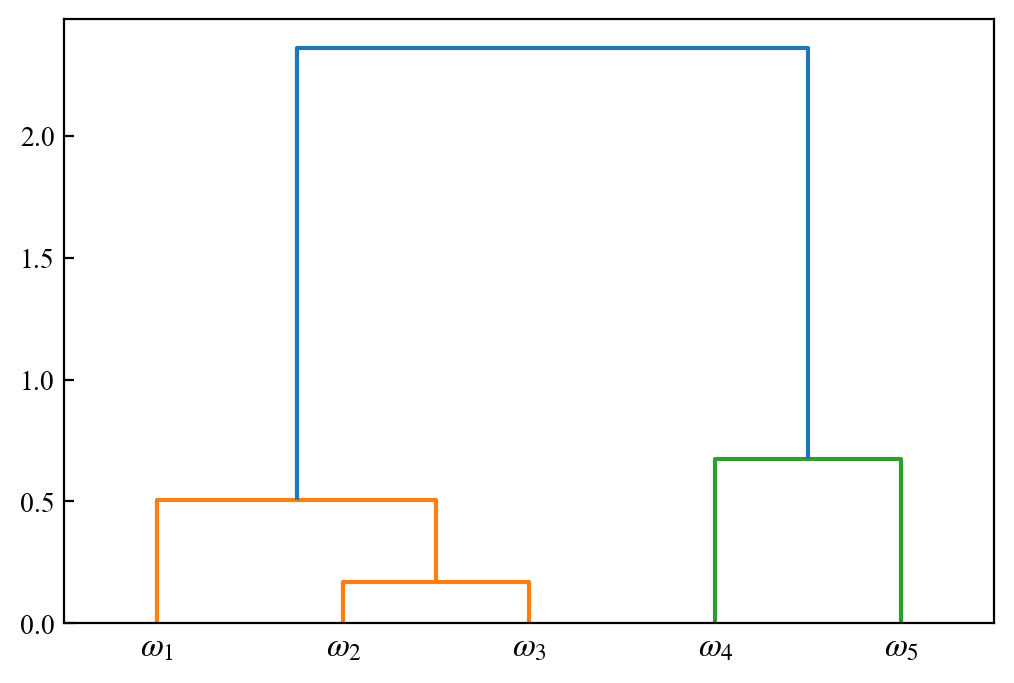

In [7]:
data = np.array([[2, 3, 3.5, 7, 9]]).T
c = sch.linkage(data, method='complete', metric='mahalanobis')  
x_tick_labels = [f'$\omega_{i}$' for i in range(1, 6)]
sch.dendrogram(c, labels=x_tick_labels)
plt.show()

#### 3. 其他系统聚类方法
(1) 重心法

定义类 $G_i$ 与 $G_j$ 之间的距离为两类间最远样品之距离

(2) 类平均法

定义类 $G_i$ 与 $G_j$ 之间的距离为类间两两样本点距离的平均

(3) 离差平方和法

### 11.1.5 动态聚类法
先粗略地分一下类，再按照某种最优原则进行修正
#### 1. $K$ 均值聚类

In [8]:
from sklearn.cluster import KMeans

data = np.array([[1, 3], [1.5, 3.2], [1.3, 2.8], [3, 1]])
md = KMeans(2).fit(data)
labels = md.labels_                 # 提取聚类标签
centers = md.cluster_centers_       # 每行是一个聚类中心
print(labels, centers, sep='\n')

[1 1 1 0]
[[3.         1.        ]
 [1.26666667 3.        ]]


#### 2. $K$ 均值聚类法最佳簇数 $k$ 值的确定
(1) 簇内离差平方和拐点法

在不同 $k$ 值下计算簇内离差平方和
$$J_k = \sum\limits_{i=1}^k\sum\limits_{\omega\in G_i}\left\|\omega-\boldsymbol m_i\right\|^2$$
然后通过可视化的方法寻找曲线的拐点，拐点对应的 $k$ 值就是最优的 $k$ 值，因为随着簇数 $k$ 的增加，聚类效果不再有大的变化

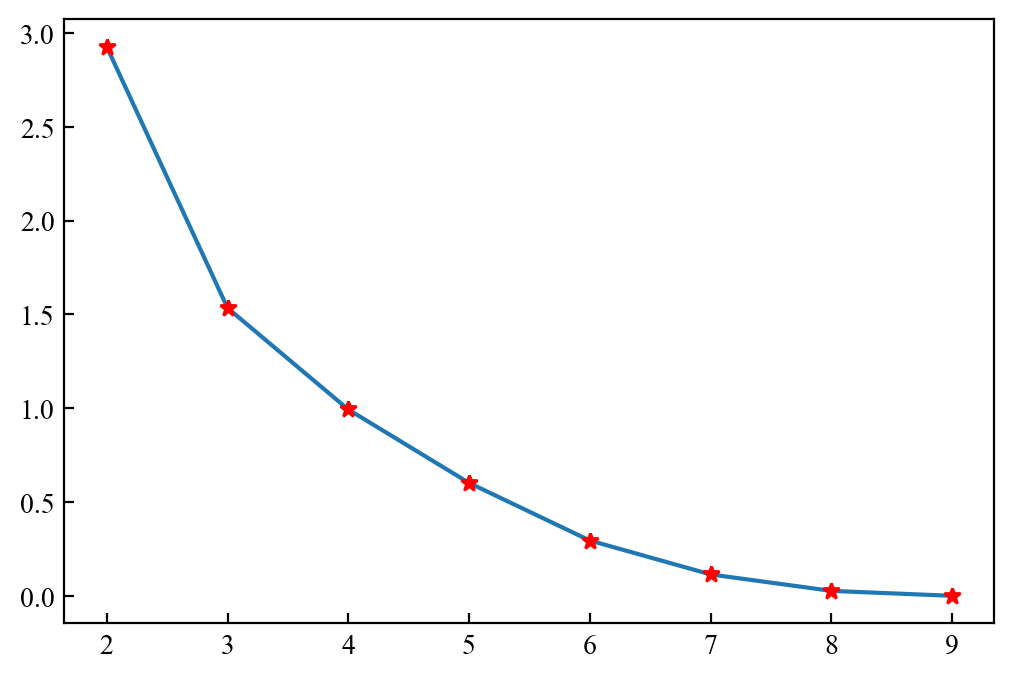

In [9]:
SSE = []
K = range(2, len(B)+1)
for k in K:
    md = KMeans(k).fit(B)
    SSE.append(md.inertia_)
plt.plot(K, SSE, '-*', markerfacecolor='r', markeredgecolor='r')
plt.show()

$k=3$ 为曲线拐点，故应把样本点聚为 $3$ 类

(2) 轮廓系数法

综合考虑簇的密集性与分散性两个信息：如果数据集被分割为理想的 $k$ 个簇，那么对应的簇内样本会很密集，而簇间样本会很分散
定义轮廓系数 
$$S_i=\dfrac{b_i-a_i}{\max{(a_i,b_i)}}$$
如果总轮廓系数小于 $0$，说明聚类效果不佳；当总轮廓系数接近于 $1$ 时，说明簇内样本的平均距离非常小，而簇间的最近距离非常大，进而表示聚类效果非常理想

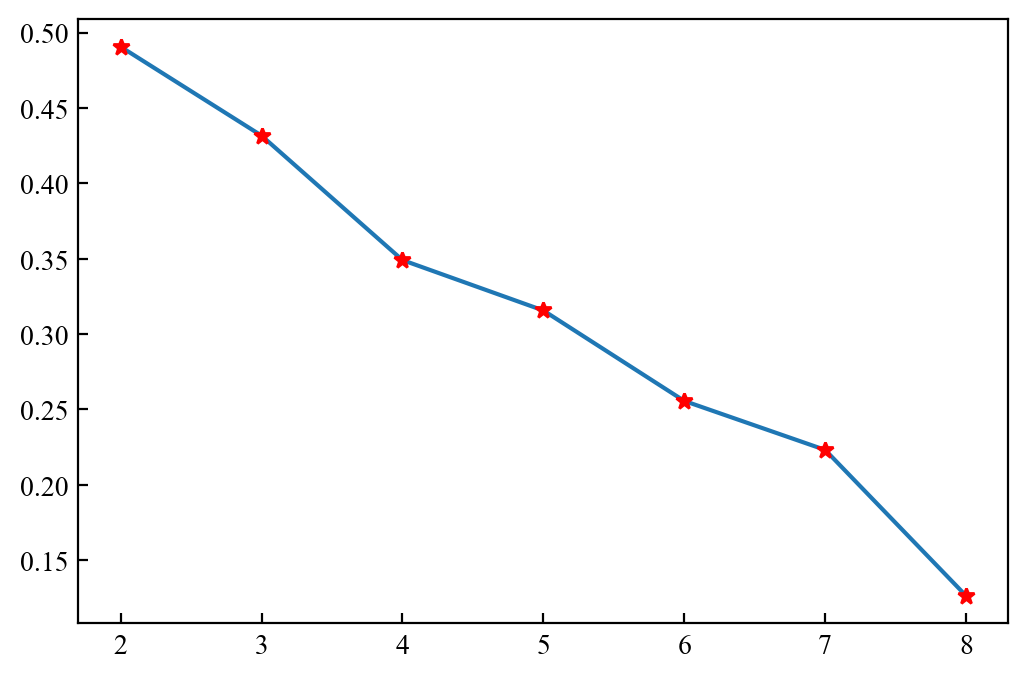

In [10]:
from sklearn.metrics import silhouette_score

S = []
K = range(2, len(B))
for i in K:
    md = KMeans(i).fit(B)
    labels = md.labels_
    S.append(silhouette_score(B, labels))
plt.plot(K, S, '-*', markerfacecolor='r', markeredgecolor='r')
plt.show()

$k=2$ 时轮廓系数最大，故应把样本点聚为 $2$ 类

### 11.1.6 R 型聚类法
#### 1. 变量相似性度量
> 无量纲，不需要标准化

(1) 相关系数

(2) 夹角余弦
#### 2. 变量聚类法
(1) 最长距离法

(2) 最短距离法

> 其中，“距离”的定义为 $d_{jk}=1-\left|r_{jk}\right|$ 或 $d_{jk}^2=1-r_{jk}^2$

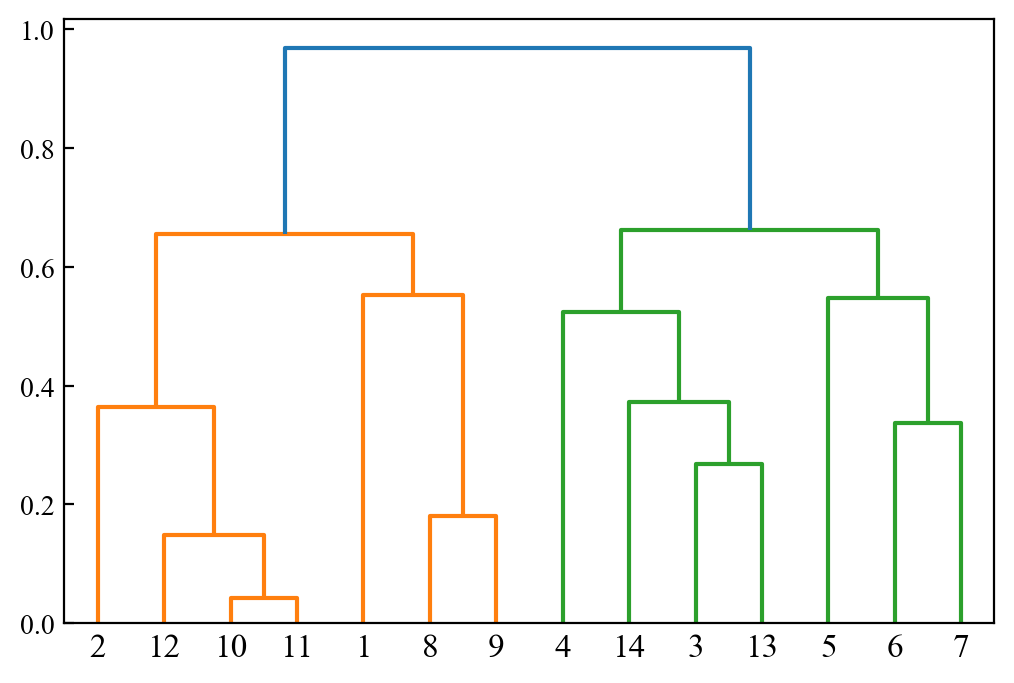

In [11]:
import pandas as pd

df = pd.read_excel('../../11第11章  聚类分析与判别分析模型/data11_8.xlsx', header=None)
b = df.values.T
b = np.triu(b, k=1)       #取对角线上方元素
r = b[np.nonzero(b)]      # x1~x2, x1~x3, ... , x1~x14, x2~x3, ... len(r) 应为某个二项式系数
d = 1 - abs(r)
z = sch.linkage(d,'complete')
sch.dendrogram(z,labels=range(1,15))
plt.show()